### linear_regression_01 코드의 data 플롯을 보여준다
    저 비워 있는 곳의 점을 찍는 것(prediction)이 코드의 목표다.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
# 한글 폰트를 설정해야 matplotlib에서 한글이 정상 출력이 된다.
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

In [4]:
x_train = [1., 2., 3., 4., 6., 7., 8., 9., 10.]
y_groundtruth = [1., 2., 3., 4., 6., 7., 8., 9., 10.]

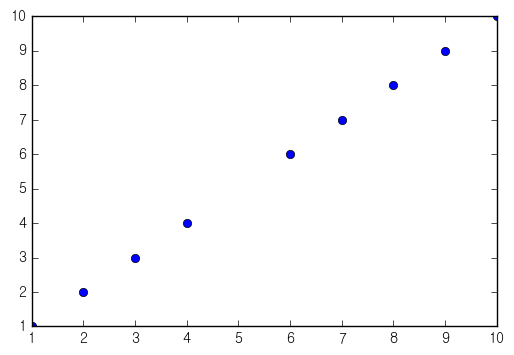

In [5]:
plt.plot(x_train, y_groundtruth, 'bo')
plt.show()

#### loss 함수에 해당하는 plot을 보면 gradient descent를 어떻게 해야 할 지 좀 더 잘 알게 될 것이다.
    이런 류의 loss 함수를 MSE(Mean Square Error), LS(Least Square), RMS(Root Mean Square) 등으로 취급한다.
    이 용어만 알아둬도 수식을 이해 할 때 아주 좋다.
# loss
loss = tf.reduce_sum(tf.square(y_hat - y)) # sum of the squares


#### W, b의 초기값으로 임의로 설정한 상태의 loss 값을 관찰해보자
    실제 학습시에는 대개 W는 0~1 사이의 normal distribution의 값을 가져오고, b는 0으로 설정한다.
    Weight initilization 문서 참고

In [7]:
W = 2.4
b = -8.0

In [8]:
y_hat = np.multiply(W, y_groundtruth) + b

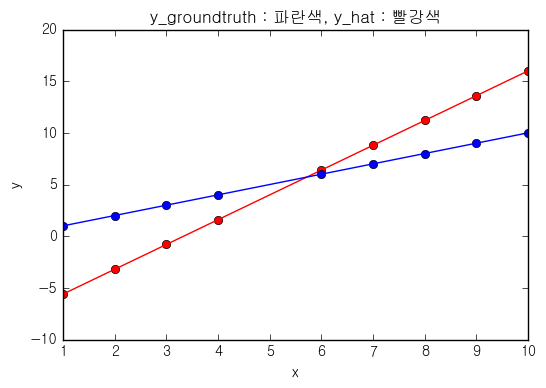

In [9]:
plt.plot(x_train, y_hat, 'ro')
plt.plot(x_train, y_hat, 'r-')
plt.plot(x_train, y_groundtruth, 'bo')
plt.plot(x_train, y_groundtruth, 'b-')
plt.title('y_groundtruth : 파란색, y_hat : 빨강색')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### cost 값으로만 plot을 그려보자.
    W = 1.0, b = 0.0 이라고 정답을 알려준 상태에서의 W 변화에 따른 loss 값의 추세를 관찰해 보자.
    gradient descent를 하면 될 것 같지 않은가?

In [10]:
W = 1.0
b = 0.0

number_of_W_range = 40
W_range = np.linspace(W - 2.0, W + 2.0, num=number_of_W_range)
cost_list = np.zeros([number_of_W_range], dtype=np.float32)
for i, W_value in enumerate(W_range):
    y_hat = np.multiply(W_value, y_groundtruth) + b
    cost_list[i] = np.sum(np.square(y_hat - y_groundtruth))

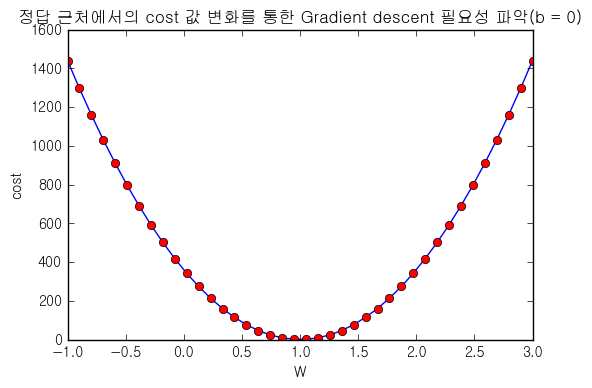

In [11]:
plt.plot(W_range, cost_list, 'b-')
plt.plot(W_range, cost_list, 'ro')
plt.title('정답 근처에서의 cost 값 변화를 통한 Gradient descent 필요성 파악(b = 0)')
plt.xlabel('W')
plt.ylabel('cost')
plt.show()